In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math

## Task One
To figure out the values of alpha and beta in y = alpha(x) + beta:
1. Find the mean values of x[i] and y[i]
2. To find alpha, sum each value of x[i] - x_mean, then multiply this by the sum of each value of y[i] - y_mean
3. Divide this result by the sum of (x[i] - x_mean)squared. This results in alpha.
4. To find beta, minus alpha*(x_mean) from the mean of y.
5. You now have both alpha and beta for the equation y = alpha*(x) + beta

## Task Two

In [2]:
df = pd.DataFrame({
    'x': [5,6,8],
    'y': [20,22,33]
})
df

,x,y
0,5,20
1,6,22
2,8,33


In [3]:
mean_of_x = (5+6+8)/3
mean_of_y = (20+22+33)/3
print(mean_of_x)
print(mean_of_y)

6.333333333333333
25.0


Now to find alpha using step 2

In [4]:
x_y_sums = ((5 - mean_of_x)*(20 - mean_of_y)) + ((6 - mean_of_x)*(22 - mean_of_y)) + ((8 - mean_of_x)*(33 - mean_of_y))
print(x_y_sums)

xs_squared = ((5 - mean_of_x)**2 + (6 - mean_of_x)**2 + (8 - mean_of_x)**2)
print(xs_squared)

alpha = x_y_sums/xs_squared
print(alpha)


21.0
4.666666666666666
4.500000000000001


Here is a more automated version of above

In [5]:
x = df['x']
y = df['y']

top = 0
bot = 0

for i in range(len(df['x'])):
    top += (x[i] - mean_of_x)*(y[i] - mean_of_y)
    bot += (x[i] - mean_of_x)**2
print(top)
print(bot)
print(top/bot)

21.0
4.666666666666666
4.500000000000001


To find beta, we multiply alpha by mean_of_x and take the result away from mean_of_y 

In [6]:
beta = mean_of_y - (alpha*mean_of_x)
print(beta)

-3.5000000000000036


Now we have both alpha and beta, we can put them into our linear equation:\
y = 4.50*(x) + (-3.50)


Here, 4.50 is the slope of the line and -3.50 is the y-intercept. If x is 0, y = -3.50 and for every value that x increases, y increases by 4.50. 

## Task Three and Four
Now I will use a larger dataset and follow the same method but with more python-like language and then try and plot the results on a graph with the line.

In [7]:
df = pd.DataFrame({
    'x': [5,6,8,10,12,13,15],
    'y': [20,22,33,30,28,34,40]
}) 
df

,x,y
0,5,20
1,6,22
2,8,33
3,10,30
4,12,28
5,13,34
6,15,40


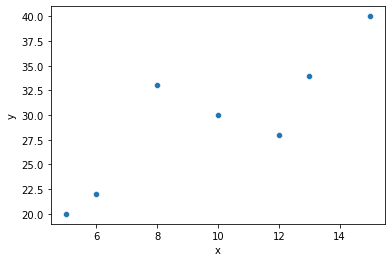

In [8]:
sns.scatterplot(data=df, x='x', y='y')
plt.show()

In [9]:
x = df.x
y = df.y

In [10]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print(x_mean, y_mean)

9.857142857142858 29.571428571428573


In [11]:
top = 0
bot = 0

for i in range(len(x)):
    top += (x[i] - x_mean)*(y[i] - y_mean)
    bot += (x[i] - x_mean)**2

alpha = top/bot
alpha

1.612068965517241

beta = y_mean - alpha*(x_mean)

In [12]:
beta = y_mean - alpha*x_mean
beta

13.681034482758625

y = alpha*(x) + beta\
Here I insert the minimum and maximum x values from my data into the equation to get the corresponding y values. 

In [13]:
five = (alpha*5) + beta
fifteen = (alpha*15) + beta
print(five)
print(fifteen)

21.741379310344833
37.86206896551724


The resulting graph with the line of best fit. Using this we can now estimate values along the line.

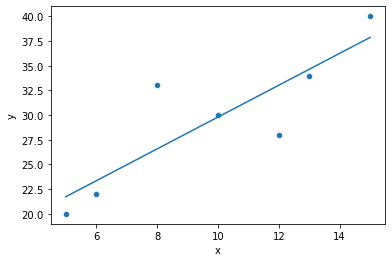

In [14]:
sns.scatterplot(data=df, x='x', y='y')
plt.plot([5,15],[21.741, 37.862])
plt.show()

#### From below I will demonstrate a more complex method, using Pearson's correlation coefficient

In [15]:
df = pd.DataFrame({'Age': [18,25,57,45,26,64,37,40,24,33], 'Yearly_Income':
                  [15000, 29000,68000,52000,32000,80000,41000,45000,26000,33000]})
df

,Age,Yearly_Income
0,18,15000
1,25,29000
2,57,68000
3,45,52000
4,26,32000
5,64,80000
6,37,41000
7,40,45000
8,24,26000
9,33,33000


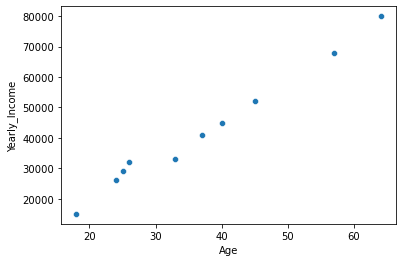

In [16]:
sns.scatterplot(data=df, x='Age', y='Yearly_Income')
plt.show()

Firstly, let's calculate alpha. The formula for this is r * (Sy/Sx) which stands for Pearson's correlation coefficient multiplying (standard deviation of y/standard deviation of x) 

This is the formula for Pearson's correlation coefficient:
![alt text](download.png "Pearson's R Formula")\
It looks daunting but we will fill this in bit by bit. If the image doesn't load, the link is: https://editor.analyticsvidhya.com/uploads/39170Formula.JPG

In [39]:
x = df.Age
y = df.Yearly_Income

top = 0
bot = 0

for i in range(len(x)):
    top += (x[i] - np.mean(x))*(y[i] - np.mean(y))
    bot += math.sqrt(((x[i] - np.mean(x))**2)*((y[i] - np.mean(y))**2))

r = top/bot
print(r)

0.999917240964218


Now we have r we can return to our formula for alpha which is r * (Sy/Sx).

In [40]:
Sy = np.std(df.Yearly_Income)
Sx = np.std(df.Age)
print(Sy, Sx)

18880.942773071478 14.187670703818863


Slotting these into our formula gives:

In [47]:
alpha = r*(Sy/Sx)
print(alpha)

1330.6892018131773


So our slope is equal to 1330.689. For every 1 value that Age moves along, Yearly Income moves by 1330.689.\
To figure out beta is easier now we have this value. The formula for beta is (mean of y) - (alpha * mean of x).

In [48]:
beta = (np.mean(df.Yearly_Income)) - (alpha * np.mean(df.Age))
print(beta)

-7002.431546906242


Now that we have all the values, we can input them into our formula:\
y = -7002.431 + (1330.689 * x)

Our maximum age is 64, but we can now predict values above this value using the formula. However, let's say the retirement age is 65 in this scenario and we're only interested in this populations active working income. Let's also set our lower boundary as 18 due to it being the youngest working age in this population.\
We can calculate the Y values by inputting 64 and 18 into our formula:

In [49]:
print(-7002.431 + 1330.689*18)
print(-7002.431 + 1330.689*64)

16949.971
78161.66500000001


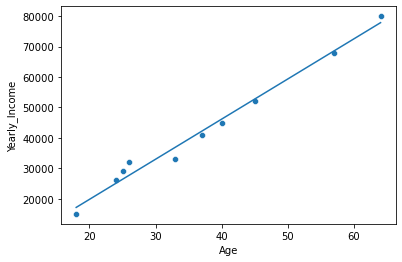

In [51]:
#plotting the scatter plot
sns.scatterplot(data=df, x='Age', y='Yearly_Income')

plt.plot([18,64], [17141.924, 77886.397])
plt.show()

Thanks for reading! 

Elliot Linsey QMUL